# Pattern Production Prediction

 Jerjes W. Porlles H.

## Data Exploration

### Loading datasets

1

In [1]:
#Loading the required libraries
import pandas as pd
prod = pd.read_excel('/Users/jerjesporlles/Dropbox/Data Mining 1/Prod.xlsx')
prod.head()

,Wellbore,Date,Qoil,Qwater,Qgas
0,CBES0001,2017-01-01,175.67,15.01,10.0
1,CBES0001,2017-01-02,175.43,15.01,10.0
2,CBES0001,2017-01-03,175.21,15.01,10.0
3,CBES0001,2017-01-04,174.16,15.01,10.0
4,CBES0001,2017-01-05,176.87,9.90,109.0


In [2]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221762 entries, 0 to 221761
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Wellbore  221762 non-null  object        
 1   Date      221762 non-null  datetime64[ns]
 2   Qoil      221762 non-null  float64       
 3   Qwater    221762 non-null  float64       
 4   Qgas      221762 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 8.5+ MB


In [3]:
win = pd.read_excel('/Users/jerjesporlles/Dropbox/Data Mining 1/Win.xlsx')
win.head()

,WellId,Date,Qwinj
0,CBES0011-A1,2017-01-01,39.183673
1,CBES0011-A1,2017-01-11,38.911565
2,CBES0011-A1,2017-01-12,39.183673
3,CBES0011-A1,2017-01-13,36.734694
4,CBES0011-A1,2017-01-22,0.000000


In [32]:
win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389650 entries, 0 to 389649
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   WellId  387315 non-null  object        
 1   Date    387315 non-null  datetime64[ns]
 2   Qwinj   387315 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.9+ MB


e

In [4]:
data = pd.read_csv('/Users/jerjesporlles/Dropbox/Data Mining 1/Pattern.csv')
data.head()

,Date,Qwinj 0866-A1b,Qwinj 0866-A1c,Qwinj 0866-A1f,Qwinj 0866-A2,Qwinj 0866-A2i,Qwinj 0867-B2b,Qwinj 0867-B2c,Qwinj 0867-B2e,Qwinj 0867-B3,...,Qwinj 1317-B2d,Qwinj 1317-B2e,Qwinj 1317-B3,Qwinj 1317-C,Qwinj 0853-A1b,Qwinj 0853-A1c,Qwinj 0853-A1f,Qwinj 0853-A2,Qwinj 0853-A2i,Qtotal 402
0,1/1/17,0.0,164.73,0.0,86.35,298.91,128.04,19.70,109.43,32.83,...,23.24,13.28,8.30,52.29,5.44,40.80,190.40,103.36,0.0,534.97
1,1/2/17,0.0,173.72,0.0,91.06,315.22,128.04,19.70,109.43,32.83,...,23.24,13.28,8.30,52.29,5.44,40.80,190.40,103.36,0.0,534.35
2,1/3/17,0.0,170.46,0.0,89.36,309.31,125.64,19.33,107.38,32.21,...,22.80,13.03,8.14,51.31,5.34,40.04,186.83,101.42,0.0,533.68
3,1/4/17,0.0,173.72,0.0,91.06,315.22,128.04,19.70,109.43,32.83,...,23.24,13.28,8.30,52.29,5.44,40.80,190.40,103.36,0.0,533.36
4,1/5/17,0.0,173.72,0.0,91.06,315.22,128.04,19.70,109.43,32.83,...,23.24,13.28,8.30,52.29,5.44,40.80,190.40,103.36,0.0,534.38


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 74 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            944 non-null    object 
 1   Qwinj 0866-A1b  944 non-null    float64
 2   Qwinj 0866-A1c  944 non-null    float64
 3   Qwinj 0866-A1f  944 non-null    float64
 4   Qwinj 0866-A2   944 non-null    float64
 5   Qwinj 0866-A2i  944 non-null    float64
 6   Qwinj 0867-B2b  944 non-null    float64
 7   Qwinj 0867-B2c  944 non-null    float64
 8   Qwinj 0867-B2e  944 non-null    float64
 9   Qwinj 0867-B3   944 non-null    float64
 10  Qwinj 1318-A1f  944 non-null    float64
 11  Qwinj 1318-A2   944 non-null    float64
 12  Qwinj 1318-A2i  944 non-null    float64
 13  Qwinj 1318-A3   944 non-null    float64
 14  Qwinj 1318-B1   944 non-null    float64
 15  Qwinj 1318-B1i  944 non-null    float64
 16  Qwinj 1318-B2   944 non-null    float64
 17  Qwinj 1318-B2b  944 non-null    flo

In [6]:
#Deleting columns with "zero" values.
dataset=data.drop(columns=['Qwinj 0839-A1d','Qwinj 0451-B1i','Qwinj 0451-B2'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            944 non-null    object 
 1   Qwinj 0866-A1b  944 non-null    float64
 2   Qwinj 0866-A1c  944 non-null    float64
 3   Qwinj 0866-A1f  944 non-null    float64
 4   Qwinj 0866-A2   944 non-null    float64
 5   Qwinj 0866-A2i  944 non-null    float64
 6   Qwinj 0867-B2b  944 non-null    float64
 7   Qwinj 0867-B2c  944 non-null    float64
 8   Qwinj 0867-B2e  944 non-null    float64
 9   Qwinj 0867-B3   944 non-null    float64
 10  Qwinj 1318-A1f  944 non-null    float64
 11  Qwinj 1318-A2   944 non-null    float64
 12  Qwinj 1318-A2i  944 non-null    float64
 13  Qwinj 1318-A3   944 non-null    float64
 14  Qwinj 1318-B1   944 non-null    float64
 15  Qwinj 1318-B1i  944 non-null    float64
 16  Qwinj 1318-B2   944 non-null    float64
 17  Qwinj 1318-B2b  944 non-null    flo

In [7]:
dataset.describe()

,Qwinj 0866-A1b,Qwinj 0866-A1c,Qwinj 0866-A1f,Qwinj 0866-A2,Qwinj 0866-A2i,Qwinj 0867-B2b,Qwinj 0867-B2c,Qwinj 0867-B2e,Qwinj 0867-B3,Qwinj 1318-A1f,...,Qwinj 1317-B2d,Qwinj 1317-B2e,Qwinj 1317-B3,Qwinj 1317-C,Qwinj 0853-A1b,Qwinj 0853-A1c,Qwinj 0853-A1f,Qwinj 0853-A2,Qwinj 0853-A2i,Qtotal 402
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.00000,...,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,41.751928,83.957881,58.222606,67.115773,139.624756,110.876981,162.965307,37.417256,20.035011,33.23947,...,4.907595,3.866780,1.842447,56.627818,19.627606,23.132595,47.414153,52.132574,121.495964,588.691282
std,43.130214,58.521921,50.119111,34.620569,85.239003,48.914991,154.728766,48.600010,16.118622,66.93040,...,8.435107,8.207239,3.310739,24.774547,32.204569,34.595853,43.931511,44.771720,83.456761,291.090596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000
25%,0.000000,36.452500,0.000000,50.000000,92.630000,77.867500,21.010000,0.000000,8.727500,0.00000,...,0.000000,0.000000,0.000000,44.850000,0.000000,0.000000,0.000000,19.500000,55.030000,400.585000
50%,25.990000,78.035000,59.950000,64.560000,121.540000,113.800000,115.500000,6.230000,15.270000,0.00000,...,0.000000,0.000000,1.910000,60.900000,0.000000,9.410000,38.080000,41.670000,121.360000,614.280000
75%,79.930000,117.420000,103.550000,82.980000,160.710000,134.070000,339.410000,105.180000,26.512500,29.09000,...,10.000000,0.000000,1.910000,68.640000,23.940000,27.610000,81.730000,67.340000,198.760000,773.172500
max,140.350000,230.840000,232.260000,216.760000,357.200000,382.480000,520.380000,113.800000,65.500000,445.68000,...,34.210000,28.240000,18.380000,115.880000,173.330000,222.570000,190.400000,250.000000,299.700000,1450.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

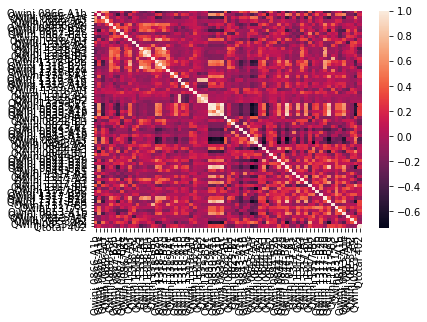

In [9]:
corr = dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

2

In [10]:
#Importing Data set
x = dataset.iloc[:, 1:70].values
y = dataset.iloc[:, 70].values

In [11]:
# Split training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [12]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() #Define the scaler
x_train = sc_x.fit_transform(x_train) #Scale the train set
x_test = sc_x.fit_transform(x_test) #Scale the test set

In [13]:
from sklearn.linear_model import LinearRegression

LRegr = LinearRegression()
fit = LRegr.fit(x_train, y_train)

y_pred = LRegr.predict(x_test)

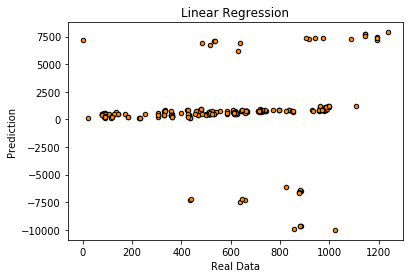

1208.9490235710898
8428462.074084863
2903.1813712003704


In [14]:
# Plot the results
import numpy as np
plt.figure()
plt.scatter(y_test, y_pred, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.xlabel("Real Data")
plt.ylabel("Prediction")
plt.title("Linear Regression")

plt.show()

# calculate MAE, MSE, RMSE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [15]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=20)
regr_2 = RandomForestRegressor(n_estimators = 20, random_state = 0)
fit1 = regr_1.fit(x_train, y_train)
fit2 = regr_2.fit(x_train, y_train)

# Predict
y_pred1 = regr_1.predict(x_test)
y_pred2 = regr_2.predict(x_test)

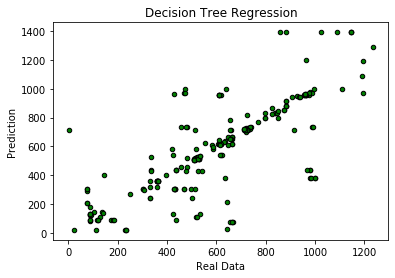

112.2918813559322
41504.651745248826
203.72690481438337


In [16]:
# Plot the results
plt.figure()
plt.scatter(y_test, y_pred1, s=20, edgecolor="black",
            c="green", label="data")
plt.xlabel("Real Data")
plt.ylabel("Prediction")
plt.title("Decision Tree Regression")

plt.show()

# calculate MAE, MSE, RMSE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred1))
print(metrics.mean_squared_error(y_test, y_pred1))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

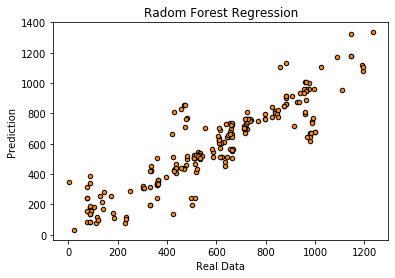

76.95768202864687
15005.823240508222
122.49825811213897


In [17]:
# Plot the results
plt.figure()
plt.scatter(y_test, y_pred2, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.xlabel("Real Data")
plt.ylabel("Prediction")
plt.title("Radom Forest Regression")

plt.show()

# calculate MAE, MSE, RMSE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred2))
print(metrics.mean_squared_error(y_test, y_pred2))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))